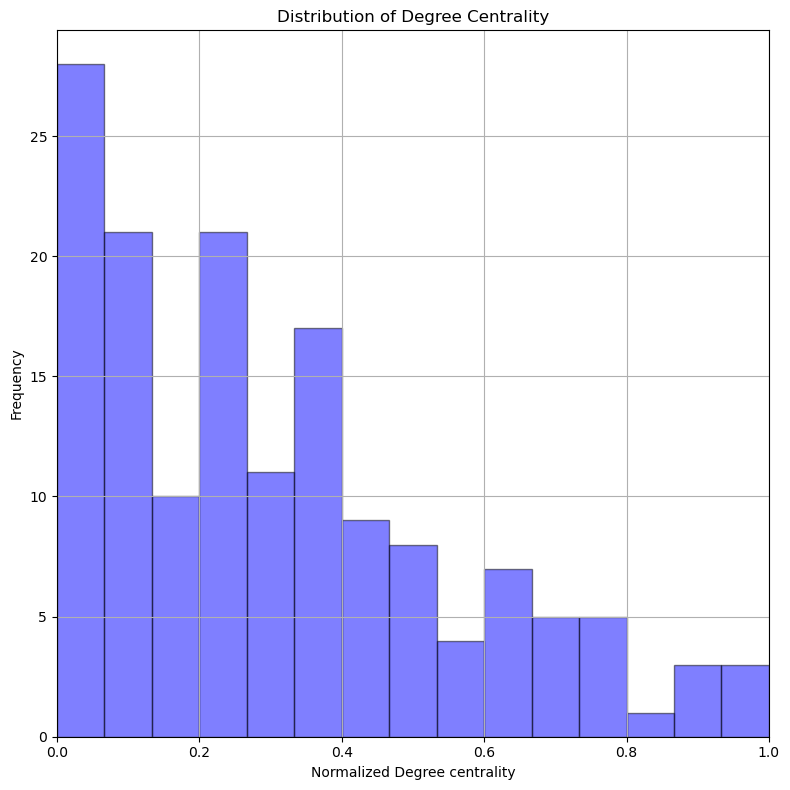

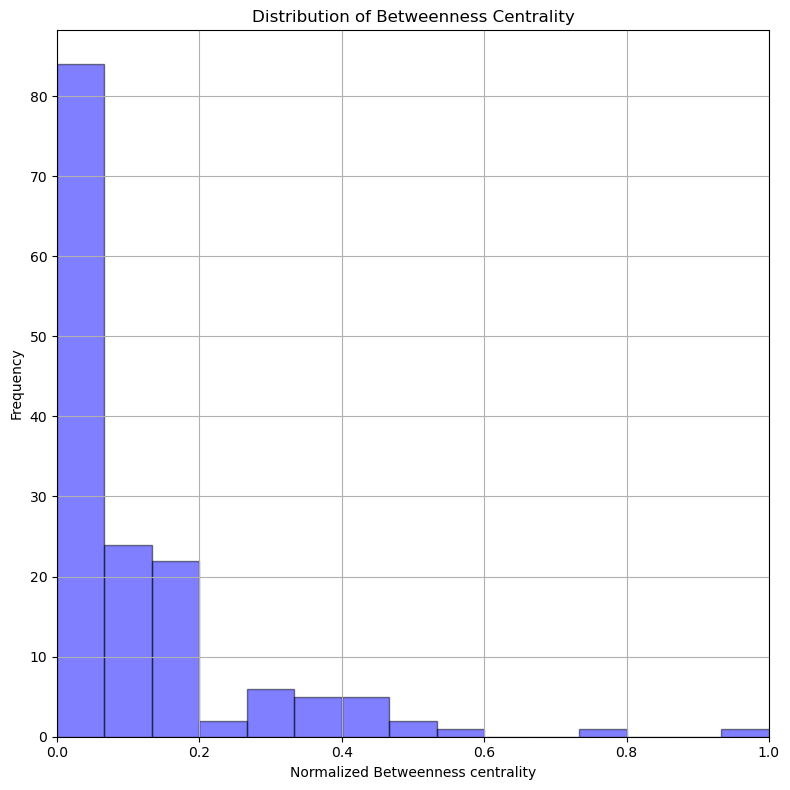

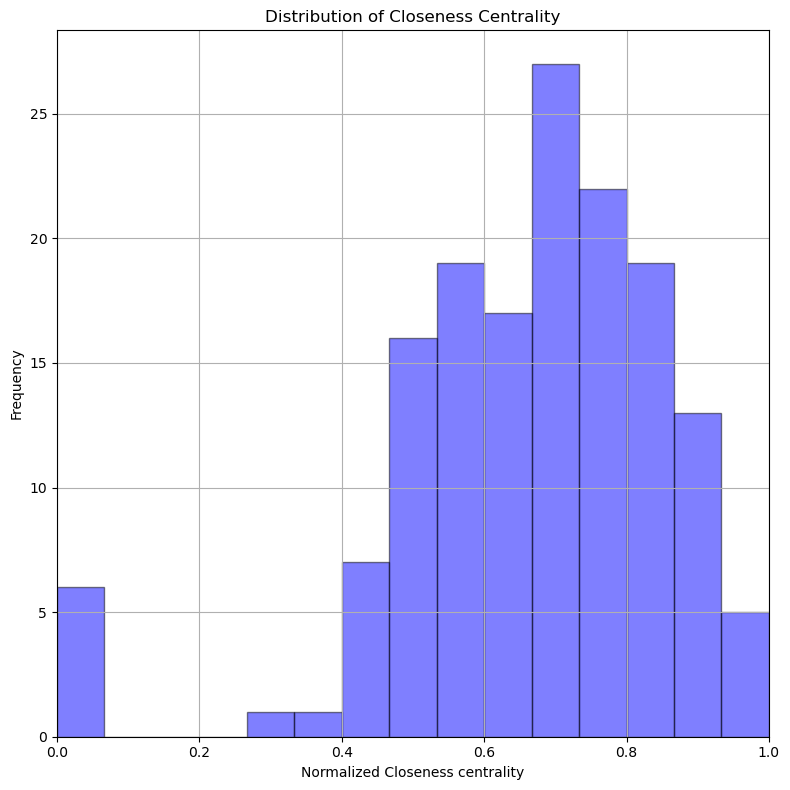

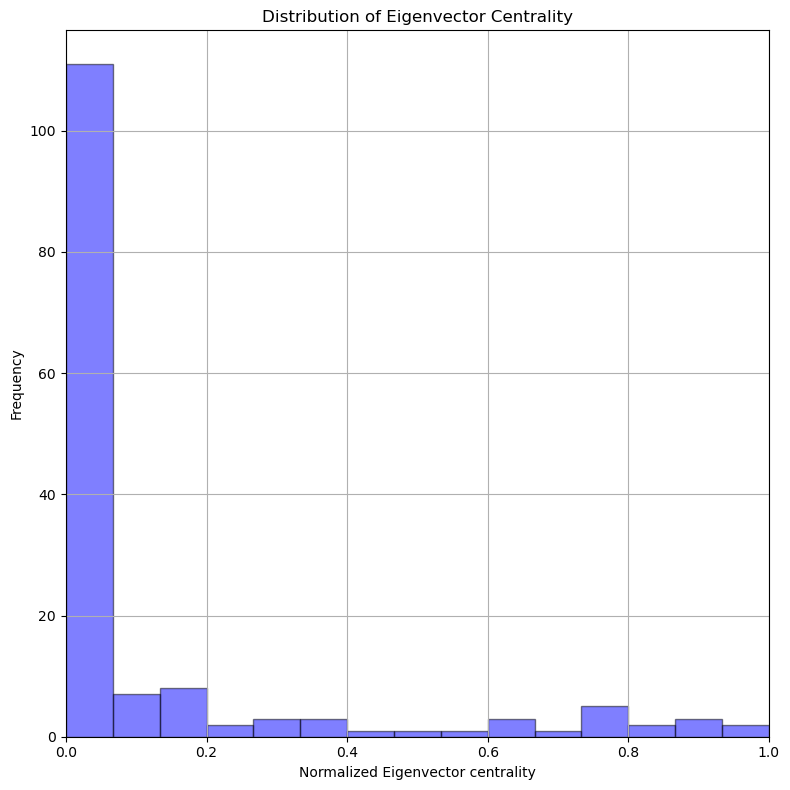

In [26]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the tab-delimited file
file_path = '/home/ramanuja-simha/Documents/code/cytoscape/cyto-purple-cutoff.txt'  # Update with your file path
df = pd.read_csv(file_path, sep='\t')

# Create the graph
G = nx.Graph()

# Add edges to the graph using 'fromNode' and 'toNode' as nodes and 'weight' as the edge weight
for _, row in df.iterrows():
    G.add_edge(row['fromNode'], row['toNode'], weight=row['weight'])

def plot_distribution(c, t, xl, yl):
    plt.figure(figsize=(8, 8))
    plt.hist(c, color='blue', bins=15, fill=True, alpha=0.5, edgecolor='black')
    plt.title(t)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.grid()
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

degree_centrality = nx.degree_centrality(G)
degree_centrality = np.array([degree_centrality[x] for x in degree_centrality])
degree_centrality = (degree_centrality - degree_centrality.min()) / (degree_centrality.max() - degree_centrality.min())
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
betweenness_centrality = np.array([betweenness_centrality[x] for x in betweenness_centrality])
betweenness_centrality = (betweenness_centrality - betweenness_centrality.min()) / (betweenness_centrality.max() - betweenness_centrality.min())
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality = np.array([closeness_centrality[x] for x in closeness_centrality])
closeness_centrality = (closeness_centrality - closeness_centrality.min()) / (closeness_centrality.max() - closeness_centrality.min())
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')
eigenvector_centrality = np.array([eigenvector_centrality[x] for x in eigenvector_centrality])
eigenvector_centrality = (eigenvector_centrality - eigenvector_centrality.min()) / (eigenvector_centrality.max() - eigenvector_centrality.min())


plot_distribution(degree_centrality, "Distribution of Degree Centrality", "Normalized Degree centrality", "Frequency")
plot_distribution(betweenness_centrality, "Distribution of Betweenness Centrality", "Normalized Betweenness centrality", "Frequency")
plot_distribution(closeness_centrality, "Distribution of Closeness Centrality", "Normalized Closeness centrality", "Frequency")
plot_distribution(eigenvector_centrality, "Distribution of Eigenvector Centrality", "Normalized Eigenvector centrality", "Frequency")